In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
# Import data
df = pd.read_csv("./crypto_data.csv", index_col=0)
# df.head()

In [9]:
# Clean imported data
trade_df = df.loc[df["IsTrading"]==True]
df = trade_df.drop("IsTrading", axis=1).dropna(axis=0, how="any")
filtered_df = df[df["TotalCoinsMined"]>0].drop("CoinName",axis=1)


In [11]:
X = pd.get_dummies(data=filtered_df, columns=["Algorithm","ProofType"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled

In [14]:
pca = PCA(n_components=.90)
pComponents = pca.fit_transform(X_scaled)

In [15]:
tsne = TSNE(perplexity=50)
tsneFeat = tsne.fit_transform(pComponents)

<function matplotlib.pyplot.show(close=None, block=None)>

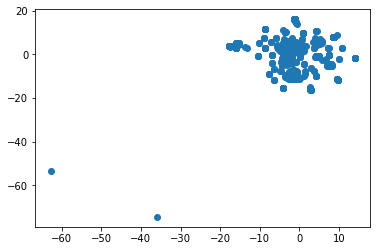

In [16]:
X = tsneFeat[:,0]
y = tsneFeat[:,1]

plt.scatter(X,y)
plt.show

In [19]:
inertia = []
k = list(range(1,20))
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

C:\Users\WayneIII\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


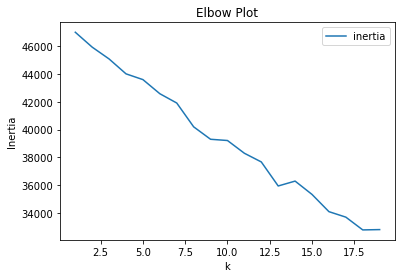

In [20]:
elbow_df = pd.DataFrame({"k":k, "inertia": inertia})
elbow_df.plot.line(x="k", y="inertia")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Plot")
plt.show()

No meaningful clusters in set dataset.